# LSTM  Model

In [87]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from functions.feature_extraction import ravdess_generation, ravdess_preprocessing, ravdess_feature_extraction
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Normalization

### Data preprocessing and features extraction

In [3]:
rd_df, path = ravdess_generation()

In [4]:
rd_df

,file_id,emotions,actor_gender
0,03-01-01-01-01-02-08.wav,1,0
1,03-01-06-02-02-01-08.wav,6,0
2,03-01-08-01-01-01-08.wav,8,0
3,03-01-05-02-02-01-08.wav,5,0
4,03-01-07-01-01-02-08.wav,7,0
...,...,...,...
1435,03-01-06-02-02-01-13.wav,6,1
1436,03-01-05-02-02-01-13.wav,5,1
1437,03-01-05-01-02-01-13.wav,5,1
1438,03-01-04-01-02-02-13.wav,4,1


In [5]:
preprocessed_df = ravdess_preprocessing(rd_df, path)

In [6]:
final_df = ravdess_feature_extraction(preprocessed_df, 2048, 512)

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-3.401008    0.32744676  0.16670673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-3.401008    0.32744676  0.16670673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-3.401008    0.32744676  0.16670673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.64077413 -2.478073   -5.394405   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.64077413 -2.478073   -5.394405   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.64077413 -2.478073   -5.394405   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.8821783  2.103219   2.1815898 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.8821783  2.103219   2.1815898 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.8821783  2.103219   2.1815898 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[32.54519  26.98372  28.153378 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[32.54519  26.98372  28.153378 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[32.54519  26.98372  28.153378 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[4.650904 4.472236 5.05604  ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[4.650904 4.472236 5.05604  ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[4.650904 4.472236 5.05604  ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tonnetz = 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[18.279331 16.151428 18.48831  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[18.279331 16.151428 18.48831  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[18.279331 16.151428 18.48831  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.03007835 4.0252743  2.6107798  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.03007835 4.0252743  2.6107798  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.03007835 4.0252743  2.6107798  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.44649163  0.46438783 -2.462436   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.44649163  0.46438783 -2.462436   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.44649163  0.46438783 -2.462436   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.38043612 1.5922474  0.7059952  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.38043612 1.5922474  0.7059952  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.38043612 1.5922474  0.7059952  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 5.3721385 36.65086   67.20109   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 5.3721385 36.65086   67.20109   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 5.3721385 36.65086   67.20109   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.3594399  0.75458515 1.0321115  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.3594399  0.75458515 1.0321115  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.3594399  0.75458515 1.0321115  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-43.635868 -40.680897 -44.84385  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-43.635868 -40.680897 -44.84385  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-43.635868 -40.680897 -44.84385  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-32.59243  -29.218515 -32.497524 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-32.59243  -29.218515 -32.497524 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-32.59243  -29.218515 -32.497524 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[11.4325285  8.239391   9.22717   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[11.4325285  8.239391   9.22717   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[11.4325285  8.239391   9.22717   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[18.273783 19.527328 10.482833 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[18.273783 19.527328 10.482833 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[18.273783 19.527328 10.482833 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.62369907 -1.0577143  -0.82166606 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.62369907 -1.0577143  -0.82166606 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.62369907 -1.0577143  -0.82166606 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-6.6293592 -1.3802329  4.4547715 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-6.6293592 -1.3802329  4.4547715 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-6.6293592 -1.3802329  4.4547715 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[23.494638 17.010641 13.968491 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[23.494638 17.010641 13.968491 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[23.494638 17.010641 13.968491 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.4633915 -2.4599    -2.5640802 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.4633915 -2.4599    -2.5640802 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.4633915 -2.4599    -2.5640802 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-4.560598  -4.9851213 -2.3777227 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-4.560598  -4.9851213 -2.3777227 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-4.560598  -4.9851213 -2.3777227 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[3.9323616 3.2465093 4.0834312 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[3.9323616 3.2465093 4.0834312 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[3.9323616 3.2465093 4.0834312 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-9.490129   2.1347785  9.924019  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-9.490129   2.1347785  9.924019  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-9.490129   2.1347785  9.924019  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.16818339 -1.0822165  -0.44260713 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.16818339 -1.0822165  -0.44260713 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.16818339 -1.0822165  -0.44260713 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-23.198362 -17.881641 -18.295399 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-23.198362 -17.881641 -18.295399 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-23.198362 -17.881641 -18.295399 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.8589048  -1.5780256  -0.53553027 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.8589048  -1.5780256  -0.53553027 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.8589048  -1.5780256  -0.53553027 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[10.56041   9.345843 11.159211 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[10.56041   9.345843 11.159211 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[10.56041   9.345843 11.159211 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[9.278717  5.2193837 9.004515  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[9.278717  5.2193837 9.004515  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[9.278717  5.2193837 9.004515  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 1.9168345 -1.5267756 -6.6299458 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 1.9168345 -1.5267756 -6.6299458 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 1.9168345 -1.5267756 -6.6299458 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-4.5642695 -3.5270772 -4.7589145 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-4.5642695 -3.5270772 -4.7589145 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-4.5642695 -3.5270772 -4.7589145 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.1095078 -1.4183201 -1.2009453 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.1095078 -1.4183201 -1.2009453 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.1095078 -1.4183201 -1.2009453 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.29613575 -0.07313497 -0.11487998 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.29613575 -0.07313497 -0.11487998 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.29613575 -0.07313497 -0.11487998 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.35650995 0.34071186 0.35648468 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.35650995 0.34071186 0.35648468 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.35650995 0.34071186 0.35648468 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.21415696 -1.2250402   0.49887666 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.21415696 -1.2250402   0.49887666 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.21415696 -1.2250402   0.49887666 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.329715   0.31895864 0.24315241 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.329715   0.31895864 0.24315241 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.329715   0.31895864 0.24315241 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.07049003 -0.08540753  0.96885365 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.07049003 -0.08540753  0.96885365 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.07049003 -0.08540753  0.96885365 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-128.48647   -32.253727   97.49592  ...    0.          0.
    0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-128.48647   -32.253727   97.49592  ...    0.          0.
    0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-128.48647   -32.253727   97.49592  ...    0.          0.
    0.      ] as keyword args. From version 0.10 passing these as positional argumen

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.1111221   0.53655934 -0.15627612 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.1111221   0.53655934 -0.15627612 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.1111221   0.53655934 -0.15627612 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.00128599  0.03259057 -0.04224807 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.00128599  0.03259057 -0.04224807 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.00128599  0.03259057 -0.04224807 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[8.332486  6.6163325 6.183675  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[8.332486  6.6163325 6.183675  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[8.332486  6.6163325 6.183675  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-52.971752  18.950615  66.2904   ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-52.971752  18.950615  66.2904   ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-52.971752  18.950615  66.2904   ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[4.125462  3.6247146 5.104575  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[4.125462  3.6247146 5.104575  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[4.125462  3.6247146 5.104575  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 9.129713 12.191469 11.871591 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 9.129713 12.191469 11.871591 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 9.129713 12.191469 11.871591 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[3.435867  3.8953474 2.5956924 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[3.435867  3.8953474 2.5956924 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[3.435867  3.8953474 2.5956924 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.7378145 7.6417346 2.0976949 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.7378145 7.6417346 2.0976949 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.7378145 7.6417346 2.0976949 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.3456158 -2.2933784  1.1537615 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.3456158 -2.2933784  1.1537615 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.3456158 -2.2933784  1.1537615 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.03575279  4.159439   -0.70095116 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.03575279  4.159439   -0.70095116 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.03575279  4.159439   -0.70095116 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[8.06951  5.889685 8.322294 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[8.06951  5.889685 8.322294 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[8.06951  5.889685 8.322294 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tonnetz = 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[7.649388  1.6054649 6.5339417 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[7.649388  1.6054649 6.5339417 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[7.649388  1.6054649 6.5339417 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.7523403  0.2596725 -4.693226  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.7523403  0.2596725 -4.693226  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.7523403  0.2596725 -4.693226  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.1523641  -0.27964753 -0.0551072  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.1523641  -0.27964753 -0.0551072  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.1523641  -0.27964753 -0.0551072  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-96.58546 -78.64461 -97.61035 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-96.58546 -78.64461 -97.61035 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-96.58546 -78.64461 -97.61035 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ -2.7813447   5.7226696 -14.8596115 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ -2.7813447   5.7226696 -14.8596115 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ -2.7813447   5.7226696 -14.8596115 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.10137355  0.10322347 -0.10610229 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.10137355  0.10322347 -0.10610229 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.10137355  0.10322347 -0.10610229 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.21616659 0.36300048 0.82448554 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.21616659 0.36300048 0.82448554 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.21616659 0.36300048 0.82448554 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-5.2038016 -5.0399103 -3.612995  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-5.2038016 -5.0399103 -3.612995  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-5.2038016 -5.0399103 -3.612995  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 9.581967  -0.8338619 -1.2406125 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 9.581967  -0.8338619 -1.2406125 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 9.581967  -0.8338619 -1.2406125 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-3.3961785 -1.849969  15.577481  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-3.3961785 -1.849969  15.577481  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-3.3961785 -1.849969  15.577481  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-47.63085    -6.1191244 -13.924937  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-47.63085    -6.1191244 -13.924937  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-47.63085    -6.1191244 -13.924937  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.15520109  0.33279234 -0.25675723 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.15520109  0.33279234 -0.25675723 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.15520109  0.33279234 -0.25675723 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 5.3147826 11.963091   1.2985508 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 5.3147826 11.963091   1.2985508 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 5.3147826 11.963091   1.2985508 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-15.616038 176.38736  215.67755  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-15.616038 176.38736  215.67755  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-15.616038 176.38736  215.67755  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.84169257 0.61011964 1.1748819  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.84169257 0.61011964 1.1748819  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.84169257 0.61011964 1.1748819  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 1.2301562   0.99953514 -1.1919196  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 1.2301562   0.99953514 -1.1919196  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 1.2301562   0.99953514 -1.1919196  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[35.89251  27.61681  32.474335 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[35.89251  27.61681  32.474335 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[35.89251  27.61681  32.474335 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.13917881 -0.49690008 -0.0341083  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.13917881 -0.49690008 -0.0341083  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.13917881 -0.49690008 -0.0341083  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.5450525  1.1838108 -3.9369395 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.5450525  1.1838108 -3.9369395 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.5450525  1.1838108 -3.9369395 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.46871814  0.11554432 -0.46509165 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.46871814  0.11554432 -0.46509165 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.46871814  0.11554432 -0.46509165 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.3997025 -2.7570531  5.6535006 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.3997025 -2.7570531  5.6535006 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.3997025 -2.7570531  5.6535006 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.00287303 -0.02384076 -0.02607421 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.00287303 -0.02384076 -0.02607421 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.00287303 -0.02384076 -0.02607421 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 3.149651   -0.17021996 -3.1090121  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 3.149651   -0.17021996 -3.1090121  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 3.149651   -0.17021996 -3.1090121  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-3.0763109 -0.0656046  1.5437435 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-3.0763109 -0.0656046  1.5437435 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-3.0763109 -0.0656046  1.5437435 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.15881033 0.7357694  0.8810733  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.15881033 0.7357694  0.8810733  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.15881033 0.7357694  0.8810733  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[1.5570183  0.95519567 1.4254576  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[1.5570183  0.95519567 1.4254576  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[1.5570183  0.95519567 1.4254576  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.21260092 -0.14303789 -0.26426575 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.21260092 -0.14303789 -0.26426575 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.21260092 -0.14303789 -0.26426575 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-18.876106   -1.2093174  11.56452   ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-18.876106   -1.2093174  11.56452   ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-18.876106   -1.2093174  11.56452   ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-28.309893 -39.922966 -39.754696 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-28.309893 -39.922966 -39.754696 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-28.309893 -39.922966 -39.754696 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-4.275502  3.068652  4.971505 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-4.275502  3.068652  4.971505 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-4.275502  3.068652  4.971505 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.23499878  0.6938769  -2.2653813  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.23499878  0.6938769  -2.2653813  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.23499878  0.6938769  -2.2653813  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 8.084482 10.730424 71.52242  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 8.084482 10.730424 71.52242  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 8.084482 10.730424 71.52242  ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-3.327342  -3.0605924 -4.77871   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-3.327342  -3.0605924 -4.77871   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-3.327342  -3.0605924 -4.77871   ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-7.585469  -1.8545202  6.9192467 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-7.585469  -1.8545202  6.9192467 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-7.585469  -1.8545202  6.9192467 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.03433185 0.15258114 0.4429263  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.03433185 0.15258114 0.4429263  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.03433185 0.15258114 0.4429263  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 2.0684288   1.11142    -0.41188225 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 2.0684288   1.11142    -0.41188225 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 2.0684288   1.11142    -0.41188225 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.7966234  -0.00139334  0.8029111  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.7966234  -0.00139334  0.8029111  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.7966234  -0.00139334  0.8029111  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.671579    0.57539874  0.573384   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.671579    0.57539874  0.573384   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.671579    0.57539874  0.573384   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-5.327477 -6.33374  -7.155606 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-5.327477 -6.33374  -7.155606 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-5.327477 -6.33374  -7.155606 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[3.6246438 2.2555957 1.1555572 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[3.6246438 2.2555957 1.1555572 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[3.6246438 2.2555957 1.1555572 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[2.485576  2.619784  2.8200617 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[2.485576  2.619784  2.8200617 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[2.485576  2.619784  2.8200617 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[  1.5740063  -1.5903106 -10.396355  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[  1.5740063  -1.5903106 -10.396355  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[  1.5740063  -1.5903106 -10.396355  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.3056614   0.15838204 -1.7597874  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.3056614   0.15838204 -1.7597874  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.3056614   0.15838204 -1.7597874  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-25.534067  15.695202  29.530472 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-25.534067  15.695202  29.530472 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-25.534067  15.695202  29.530472 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.8465882 1.4315364 0.9649792 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.8465882 1.4315364 0.9649792 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.8465882 1.4315364 0.9649792 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.7539384 -1.208972  -2.999751  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.7539384 -1.208972  -2.999751  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.7539384 -1.208972  -2.999751  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-11.176704 -16.967155  -8.314791 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-11.176704 -16.967155  -8.314791 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-11.176704 -16.967155  -8.314791 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.3358214   1.9033136  -0.98673105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.3358214   1.9033136  -0.98673105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.3358214   1.9033136  -0.98673105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[33.560036 18.897568 21.524963 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[33.560036 18.897568 21.524963 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[33.560036 18.897568 21.524963 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 7.8194933  1.5033787 -5.8826118 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 7.8194933  1.5033787 -5.8826118 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 7.8194933  1.5033787 -5.8826118 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[12.402768 10.495596 12.809587 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[12.402768 10.495596 12.809587 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[12.402768 10.495596 12.809587 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.82091683 -0.7226548  -0.96381    ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.82091683 -0.7226548  -0.96381    ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.82091683 -0.7226548  -0.96381    ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 14.546381 -52.765594  -8.079254 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 14.546381 -52.765594  -8.079254 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 14.546381 -52.765594  -8.079254 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.14393432 -0.09168488  0.08919678 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.14393432 -0.09168488  0.08919678 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.14393432 -0.09168488  0.08919678 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 1.0890402 -7.2541485 -7.232972  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 1.0890402 -7.2541485 -7.232972  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 1.0890402 -7.2541485 -7.232972  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 1.3499701  1.2565671 -0.7600235 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 1.3499701  1.2565671 -0.7600235 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 1.3499701  1.2565671 -0.7600235 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.4604626 -2.533713  -2.8205414 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.4604626 -2.533713  -2.8205414 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.4604626 -2.533713  -2.8205414 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.1430693  0.261998   0.35629126 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.1430693  0.261998   0.35629126 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.1430693  0.261998   0.35629126 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[7.4690814 6.4271    5.332243  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[7.4690814 6.4271    5.332243  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[7.4690814 6.4271    5.332243  ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-5.413614   1.4693861  1.8005478 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-5.413614   1.4693861  1.8005478 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-5.413614   1.4693861  1.8005478 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-6.601861 -6.861016 -7.798935 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-6.601861 -6.861016 -7.798935 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-6.601861 -6.861016 -7.798935 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.1227376 -2.9936385 -3.508328  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.1227376 -2.9936385 -3.508328  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.1227376 -2.9936385 -3.508328  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.1656787 -3.1751683 -1.7715458 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.1656787 -3.1751683 -1.7715458 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.1656787 -3.1751683 -1.7715458 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.9739837   0.02286731 -0.10687342 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.9739837   0.02286731 -0.10687342 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.9739837   0.02286731 -0.10687342 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[5.8212247 3.058246  4.4768167 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[5.8212247 3.058246  4.4768167 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[5.8212247 3.058246  4.4768167 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 10.994616  12.12699  -37.652237 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 10.994616  12.12699  -37.652237 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 10.994616  12.12699  -37.652237 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 6.1120033 23.256205   2.9654534 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 6.1120033 23.256205   2.9654534 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 6.1120033 23.256205   2.9654534 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[1.1514115 1.2851851 1.0822141 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[1.1514115 1.2851851 1.0822141 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[1.1514115 1.2851851 1.0822141 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.2590376  -0.64425606 -0.8148278  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.2590376  -0.64425606 -0.8148278  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.2590376  -0.64425606 -0.8148278  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.4579186 -2.9620118 -3.7872872 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.4579186 -2.9620118 -3.7872872 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.4579186 -2.9620118 -3.7872872 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.35865548 -0.54548734  0.02003464 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.35865548 -0.54548734  0.02003464 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.35865548 -0.54548734  0.02003464 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.1244628 -2.2896738 -2.8821867 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.1244628 -2.2896738 -2.8821867 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.1244628 -2.2896738 -2.8821867 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[1.4816465  3.2484949  0.36336115 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[1.4816465  3.2484949  0.36336115 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[1.4816465  3.2484949  0.36336115 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 3.0826485   1.0230907  -0.34962225 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 3.0826485   1.0230907  -0.34962225 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 3.0826485   1.0230907  -0.34962225 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.275641   -1.2334801   0.09155182 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.275641   -1.2334801   0.09155182 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.275641   -1.2334801   0.09155182 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[56.0026   53.683933 58.551586 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[56.0026   53.683933 58.551586 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[56.0026   53.683933 58.551586 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ -9.376741  -10.755146   -1.9080964 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ -9.376741  -10.755146   -1.9080964 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ -9.376741  -10.755146   -1.9080964 ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.709121  -0.367481  -1.8660469 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.709121  -0.367481  -1.8660469 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.709121  -0.367481  -1.8660469 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.6221661  -0.5261072  -0.03720254 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.6221661  -0.5261072  -0.03720254 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.6221661  -0.5261072  -0.03720254 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.23464957  1.0380185  -0.10232385 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.23464957  1.0380185  -0.10232385 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.23464957  1.0380185  -0.10232385 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.47199875  0.46394268  0.38992828 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.47199875  0.46394268  0.38992828 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.47199875  0.46394268  0.38992828 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ -6.5826535  -9.686431  -15.240266  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ -6.5826535  -9.686431  -15.240266  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ -6.5826535  -9.686431  -15.240266  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-5.698919  -2.7272954 -3.038851  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-5.698919  -2.7272954 -3.038851  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-5.698919  -2.7272954 -3.038851  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.0023514 -4.7036896 -7.0630417 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.0023514 -4.7036896 -7.0630417 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.0023514 -4.7036896 -7.0630417 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[8.241126  0.5272452 3.6049194 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[8.241126  0.5272452 3.6049194 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[8.241126  0.5272452 3.6049194 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[21.020256 11.270456 15.915048 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[21.020256 11.270456 15.915048 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[21.020256 11.270456 15.915048 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-64.23421 -64.60445  51.86142 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-64.23421 -64.60445  51.86142 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-64.23421 -64.60445  51.86142 ...   0.        0.        0.     ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.24603122  0.52794594 -0.30703527 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.24603122  0.52794594 -0.30703527 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.24603122  0.52794594 -0.30703527 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 2.1175995  2.8935816 -0.5689559 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 2.1175995  2.8935816 -0.5689559 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 2.1175995  2.8935816 -0.5689559 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-15.877358 -46.89441  -26.31838  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-15.877358 -46.89441  -26.31838  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-15.877358 -46.89441  -26.31838  ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.03041851  0.09983528 -0.70454586 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.03041851  0.09983528 -0.70454586 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.03041851  0.09983528 -0.70454586 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 48.661724  13.23212  -25.722883 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 48.661724  13.23212  -25.722883 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 48.661724  13.23212  -25.722883 ...   0.         0.         0.      ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[2.2472177  0.76803684 0.22737359 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[2.2472177  0.76803684 0.22737359 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[2.2472177  0.76803684 0.22737359 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.01209472 -0.19880982  0.12072819 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.01209472 -0.19880982  0.12072819 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.01209472 -0.19880982  0.12072819 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.90158594 -1.8677479   0.3358925  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.90158594 -1.8677479   0.3358925  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.90158594 -1.8677479   0.3358925  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.72972125 -0.7340559  -1.2374587  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.72972125 -0.7340559  -1.2374587  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.72972125 -0.7340559  -1.2374587  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[11.127032   7.620253   1.0359575 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[11.127032   7.620253   1.0359575 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[11.127032   7.620253   1.0359575 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.9709322 -1.0985919 -0.8850791 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.9709322 -1.0985919 -0.8850791 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.9709322 -1.0985919 -0.8850791 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[1.1099051  0.84709305 0.7703405  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[1.1099051  0.84709305 0.7703405  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[1.1099051  0.84709305 0.7703405  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.38616407 -0.00128307 -0.3237306  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.38616407 -0.00128307 -0.3237306  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.38616407 -0.00128307 -0.3237306  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.7799256 -4.1699634 -3.645115  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.7799256 -4.1699634 -3.645115  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.7799256 -4.1699634 -3.645115  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.19840318  0.05760715  0.14831455 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.19840318  0.05760715  0.14831455 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.19840318  0.05760715  0.14831455 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[14.091665  -4.4093347 -2.6964076 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[14.091665  -4.4093347 -2.6964076 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[14.091665  -4.4093347 -2.6964076 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.0866683 -1.7233832 -2.5546904 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.0866683 -1.7233832 -2.5546904 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.0866683 -1.7233832 -2.5546904 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.28401545 0.9131701  0.5157948  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.28401545 0.9131701  0.5157948  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.28401545 0.9131701  0.5157948  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[39.554348 43.716293 13.771396 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[39.554348 43.716293 13.771396 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[39.554348 43.716293 13.771396 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-2.1722033 -2.4679148 -2.3797383 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-2.1722033 -2.4679148 -2.3797383 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-2.1722033 -2.4679148 -2.3797383 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.7393051  -1.2092993  -0.35876054 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.7393051  -1.2092993  -0.35876054 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.7393051  -1.2092993  -0.35876054 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.13937669 0.727936   0.24541801 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.13937669 0.727936   0.24541801 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.13937669 0.727936   0.24541801 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.51860464 -0.1714093   0.42575037 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.51860464 -0.1714093   0.42575037 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.51860464 -0.1714093   0.42575037 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ -8.765755    5.1595473 -43.759842  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ -8.765755    5.1595473 -43.759842  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ -8.765755    5.1595473 -43.759842  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.5358693  -0.61990833 -0.1908581  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.5358693  -0.61990833 -0.1908581  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.5358693  -0.61990833 -0.1908581  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.13560699 -0.565736    0.08402715 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.13560699 -0.565736    0.08402715 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.13560699 -0.565736    0.08402715 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.53232604 -0.2967152   0.06592105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.53232604 -0.2967152   0.06592105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.53232604 -0.2967152   0.06592105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.1921452 -1.7073858  4.6939087 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.1921452 -1.7073858  4.6939087 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.1921452 -1.7073858  4.6939087 ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.09599119 0.16046591 0.41491187 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.09599119 0.16046591 0.41491187 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.09599119 0.16046591 0.41491187 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.05140994 -0.24567987 -0.6848867  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.05140994 -0.24567987 -0.6848867  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.05140994 -0.24567987 -0.6848867  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[1.5819622 0.7764525 0.9995766 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[1.5819622 0.7764525 0.9995766 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[1.5819622 0.7764525 0.9995766 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-4.778715   6.3571377 -7.522325  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-4.778715   6.3571377 -7.522325  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-4.778715   6.3571377 -7.522325  ...  0.         0.         0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[51.71264  -8.077802 19.728401 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[51.71264  -8.077802 19.728401 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[51.71264  -8.077802 19.728401 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[4.773722  2.1013796 4.8354516 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[4.773722  2.1013796 4.8354516 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[4.773722  2.1013796 4.8354516 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ -1.8813809  -6.8190765 -17.738453  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ -1.8813809  -6.8190765 -17.738453  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ -1.8813809  -6.8190765 -17.738453  ...   0.          0.
   0.       ] as keyword args. From version 0.10 passing these as positional arguments 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.8919731 2.4208574 1.6840953 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.8919731 2.4208574 1.6840953 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.8919731 2.4208574 1.6840953 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[17.20502  41.71937  57.284435 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[17.20502  41.71937  57.284435 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[17.20502  41.71937  57.284435 ...  0.        0.        0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.40119895 -0.04551291  1.4706417  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.40119895 -0.04551291  1.4706417  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.40119895 -0.04551291  1.4706417  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-1.4521801  -1.8104203  -0.31958574 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-1.4521801  -1.8104203  -0.31958574 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-1.4521801  -1.8104203  -0.31958574 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[0.9781077 0.7475467 1.2453802 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[0.9781077 0.7475467 1.2453802 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[0.9781077 0.7475467 1.2453802 ... 0.        0.        0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.33868214 -0.29889926 -0.08798342 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.33868214 -0.29889926 -0.08798342 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.33868214 -0.29889926 -0.08798342 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.3420374   0.11648414  0.5069865  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.3420374   0.11648414  0.5069865  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.3420374   0.11648414  0.5069865  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[ 0.23384997 -0.58998793 -0.00949509 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[ 0.23384997 -0.58998793 -0.00949509 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[ 0.23384997 -0.58998793 -0.00949509 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[7.049987 6.309994 6.062784 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[7.049987 6.309994 6.062784 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[7.049987 6.309994 6.062784 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tonnetz = 

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[-0.7969034   0.28858206  0.29929033 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[-0.7969034   0.28858206  0.29929033 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[-0.7969034   0.28858206  0.29929033 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments wil

/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:59: FutureWarning: Pass y=[9.556437 4.850896 4.862551 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_feature = librosa.feature.rms(i, frame_length=frame_length, hop_length=hop_length)
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:61: FutureWarning: Pass y=[9.556437 4.850896 4.862551 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(i, sr=sr, S=None, n_mfcc=25, hop_length = hop_length) # MFCCs
/home/jesus/code/JesusZeDo/speech-emotion-recognition/functions/feature_extraction.py:62: FutureWarning: Pass y=[9.556437 4.850896 4.862551 ... 0.       0.       0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tonnetz = 

In [7]:
final_df.shape

(1440, 9)

In [8]:
final_df.head(3)

,file_id,emotions,actor_gender,processed_sound,sample_rate,rms,zero_crossing_rate,mfcc,tonnetz
0,03-01-01-01-01-02-08.wav,1,0,"[-3.401008, 0.32744676, 0.16670673, 0.9080972,...",48000,"[[148.48126, 399.50955, 552.00055, 766.2092, 8...","[[0.16845703125, 0.20947265625, 0.26806640625,...","[[368.04514, 493.20773, 575.6261, 602.2591, 61...","[[-0.0843857610518336, -0.07845763355869262, -..."
1,03-01-06-02-02-01-08.wav,6,0,"[26.824442, 24.22226, 21.907953, 18.15882, 17....",48000,"[[118.94623, 274.58743, 333.7066, 699.92786, 1...","[[0.017578125, 0.107421875, 0.17578125, 0.1826...","[[404.89752, 532.5331, 611.7813, 637.7688, 667...","[[-0.0008134294750809775, -0.02128816391384699..."
2,03-01-08-01-01-01-08.wav,8,0,"[6.790744, -2.4801686, -3.398234, 2.2325964, -...",48000,"[[239.18535, 404.73547, 649.10925, 758.47534, ...","[[0.1533203125, 0.21875, 0.28466796875, 0.2509...","[[484.82828, 596.60956, 656.5203, 670.65106, 6...","[[0.03838882042865868, 0.014821295368299075, 0..."


In [106]:
X = final_df['mfcc']
y = final_df['emotions']

In [107]:
type(X)

pandas.core.series.Series

In [108]:
X = list(X)
y = list(y)

In [109]:
X = np.asarray(X).astype('float32')
X = np.swapaxes(X,1,2)
y = np.asarray(y).astype('float32')

In [110]:
print('X shape:', X.shape)
print('y shape:',y.shape)

X shape: (1440, 448, 25)
y shape: (1440,)


In [111]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))
print(lb.classes_)
y

[1. 2. 3. 4. 5. 6. 7. 8.]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [112]:
# Split to train, validation, and test sets.
from sklearn.model_selection import train_test_split
X_train, X_tosplit, y_train, y_tosplit = train_test_split(X, y, test_size = 0.125, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_tosplit, y_tosplit, test_size = 0.304, random_state = 1)

#'One-hot' vectors for Y: emotion classification
#y_train_class = tf.keras.utils.to_categorical(y_train, 8, dtype = 'int8')
#y_val_class = tf.keras.utils.to_categorical(y_val, 8, dtype = 'int8')

In [113]:
# x_train, x_val, and x_test shape check.
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(1260, 448, 25)
(125, 448, 25)
(55, 448, 25)


In [67]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1152, 448, 25), (288, 448, 25), (1152, 8), (288, 8))

In [114]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [70]:
#normalizer = Normalization()
#normalizer.adapt(X_train)

### Initiate Model

In [115]:
model = Sequential()
model.add(layers.LSTM(64, return_sequences = True, input_shape=(X.shape[1:3])))
model.add(layers.LSTM(64))
model.add(layers.Dense(8, activation = 'softmax'))
print(model.summary())



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 448, 64)           23040     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
Total params: 56,584
Trainable params: 56,584
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
batch_size = 23
                             
# Compile & train   
model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])

history = model.fit(X_train, y_train, 
                      epochs=340, batch_size = batch_size, 
                      validation_data = (X_val, y_val), 
                      callbacks=[early_stop,lr_reduction])
# Define the best weights to the model.
#model.load_weights(checkpoint_path)

Epoch 1/340
55/55 [==============================] - 28s 447ms/step - loss: 2.0576 - categorical_accuracy: 0.1500 - val_loss: 2.0488 - val_categorical_accuracy: 0.1520 - lr: 0.0010
Epoch 2/340
55/55 [==============================] - 28s 501ms/step - loss: 1.9817 - categorical_accuracy: 0.1984 - val_loss: 2.0061 - val_categorical_accuracy: 0.1520 - lr: 0.0010
Epoch 3/340
55/55 [==============================] - 27s 498ms/step - loss: 1.9371 - categorical_accuracy: 0.2381 - val_loss: 1.8674 - val_categorical_accuracy: 0.2560 - lr: 0.0010
Epoch 4/340
55/55 [==============================] - 28s 502ms/step - loss: 1.8754 - categorical_accuracy: 0.2524 - val_loss: 1.8411 - val_categorical_accuracy: 0.3200 - lr: 0.0010
Epoch 5/340
55/55 [==============================] - 27s 495ms/step - loss: 1.8713 - categorical_accuracy: 0.2722 - val_loss: 1.8417 - val_categorical_accuracy: 0.2320 - lr: 0.0010
Epoch 6/340
55/55 [==============================] - 27s 491ms/step - loss: 1.8521 - categorica

Epoch 14/340
55/55 [==============================] - 28s 502ms/step - loss: 1.6982 - categorical_accuracy: 0.3405 - val_loss: 1.6342 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 15/340
55/55 [==============================] - 28s 501ms/step - loss: 1.6890 - categorical_accuracy: 0.3468 - val_loss: 1.6053 - val_categorical_accuracy: 0.4240 - lr: 0.0010
Epoch 16/340
55/55 [==============================] - 27s 484ms/step - loss: 1.6350 - categorical_accuracy: 0.3817 - val_loss: 1.6005 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 17/340
55/55 [==============================] - 27s 487ms/step - loss: 1.6185 - categorical_accuracy: 0.3881 - val_loss: 1.6285 - val_categorical_accuracy: 0.3520 - lr: 0.0010
Epoch 18/340
55/55 [==============================] - 26s 481ms/step - loss: 1.6032 - categorical_accuracy: 0.3802 - val_loss: 1.6263 - val_categorical_accuracy: 0.3680 - lr: 0.0010
Epoch 19/340
55/55 [==============================] - 27s 487ms/step - loss: 1.5878 - cate

Epoch 27/340
55/55 [==============================] - 26s 479ms/step - loss: 1.4647 - categorical_accuracy: 0.4381 - val_loss: 1.6255 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 28/340
55/55 [==============================] - 27s 486ms/step - loss: 1.4607 - categorical_accuracy: 0.4413 - val_loss: 1.7714 - val_categorical_accuracy: 0.3760 - lr: 0.0010
Epoch 29/340
55/55 [==============================] - 26s 480ms/step - loss: 1.4502 - categorical_accuracy: 0.4500 - val_loss: 1.6613 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 30/340
55/55 [==============================] - 27s 482ms/step - loss: 1.4459 - categorical_accuracy: 0.4500 - val_loss: 1.5749 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 31/340
55/55 [==============================] - 27s 493ms/step - loss: 1.4483 - categorical_accuracy: 0.4532 - val_loss: 1.6445 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 32/340
55/55 [==============================] - 26s 481ms/step - loss: 1.4234 - cate

Epoch 40/340
55/55 [==============================] - 27s 484ms/step - loss: 1.3000 - categorical_accuracy: 0.5063 - val_loss: 1.8693 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 41/340
55/55 [==============================] - 27s 483ms/step - loss: 1.2963 - categorical_accuracy: 0.5087 - val_loss: 1.6845 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 42/340
55/55 [==============================] - 27s 484ms/step - loss: 1.2824 - categorical_accuracy: 0.5135 - val_loss: 1.7602 - val_categorical_accuracy: 0.3920 - lr: 0.0010
Epoch 43/340
55/55 [==============================] - 26s 480ms/step - loss: 1.2888 - categorical_accuracy: 0.5159 - val_loss: 1.7574 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 44/340
55/55 [==============================] - 26s 481ms/step - loss: 1.2534 - categorical_accuracy: 0.5397 - val_loss: 1.8739 - val_categorical_accuracy: 0.3360 - lr: 0.0010
Epoch 45/340
55/55 [==============================] - 27s 483ms/step - loss: 1.2294 - cate

Epoch 53/340
55/55 [==============================] - 26s 480ms/step - loss: 1.1431 - categorical_accuracy: 0.5817 - val_loss: 1.8208 - val_categorical_accuracy: 0.3920 - lr: 0.0010
Epoch 54/340
55/55 [==============================] - 27s 482ms/step - loss: 1.1243 - categorical_accuracy: 0.5921 - val_loss: 1.7347 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 55/340
55/55 [==============================] - 27s 484ms/step - loss: 1.1070 - categorical_accuracy: 0.5952 - val_loss: 1.7161 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 56/340
55/55 [==============================] - 27s 484ms/step - loss: 1.1143 - categorical_accuracy: 0.5921 - val_loss: 1.8036 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 57/340
55/55 [==============================] - 26s 482ms/step - loss: 1.1282 - categorical_accuracy: 0.5841 - val_loss: 1.7642 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 58/340
55/55 [==============================] - 27s 482ms/step - loss: 1.0956 - cate

Epoch 66/340
55/55 [==============================] - 26s 481ms/step - loss: 1.0400 - categorical_accuracy: 0.6040 - val_loss: 1.8235 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 67/340
55/55 [==============================] - 27s 491ms/step - loss: 1.0177 - categorical_accuracy: 0.6135 - val_loss: 1.7589 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 68/340
55/55 [==============================] - 27s 500ms/step - loss: 1.0241 - categorical_accuracy: 0.6254 - val_loss: 1.9280 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 69/340
55/55 [==============================] - 26s 479ms/step - loss: 1.0831 - categorical_accuracy: 0.5944 - val_loss: 1.7412 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 70/340
55/55 [==============================] - 27s 483ms/step - loss: 1.0668 - categorical_accuracy: 0.6071 - val_loss: 1.7592 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 71/340
55/55 [==============================] - 27s 490ms/step - loss: 1.0628 - cate

Epoch 79/340
55/55 [==============================] - 27s 485ms/step - loss: 0.9496 - categorical_accuracy: 0.6516 - val_loss: 1.7793 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 80/340
55/55 [==============================] - 26s 480ms/step - loss: 1.0190 - categorical_accuracy: 0.6294 - val_loss: 1.8381 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 81/340
55/55 [==============================] - 27s 482ms/step - loss: 0.9851 - categorical_accuracy: 0.6421 - val_loss: 1.7194 - val_categorical_accuracy: 0.3920 - lr: 0.0010
Epoch 82/340
55/55 [==============================] - 27s 493ms/step - loss: 1.0025 - categorical_accuracy: 0.6405 - val_loss: 1.7275 - val_categorical_accuracy: 0.4800 - lr: 0.0010
Epoch 83/340
55/55 [==============================] - 27s 485ms/step - loss: 0.9594 - categorical_accuracy: 0.6397 - val_loss: 1.7494 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 84/340
55/55 [==============================] - 27s 487ms/step - loss: 0.9634 - cate

Epoch 92/340
55/55 [==============================] - 27s 483ms/step - loss: 0.9729 - categorical_accuracy: 0.6516 - val_loss: 1.8581 - val_categorical_accuracy: 0.3680 - lr: 0.0010
Epoch 93/340
55/55 [==============================] - 27s 486ms/step - loss: 0.8996 - categorical_accuracy: 0.6770 - val_loss: 1.8561 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 94/340
55/55 [==============================] - 27s 487ms/step - loss: 0.8737 - categorical_accuracy: 0.6849 - val_loss: 1.9132 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 95/340
55/55 [==============================] - 27s 487ms/step - loss: 0.9009 - categorical_accuracy: 0.6659 - val_loss: 2.1783 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 96/340
55/55 [==============================] - 27s 485ms/step - loss: 0.9044 - categorical_accuracy: 0.6841 - val_loss: 1.9895 - val_categorical_accuracy: 0.3840 - lr: 0.0010
Epoch 97/340
55/55 [==============================] - 27s 482ms/step - loss: 0.8760 - cate

Epoch 105/340
55/55 [==============================] - 27s 484ms/step - loss: 0.8290 - categorical_accuracy: 0.7024 - val_loss: 1.7922 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 106/340
55/55 [==============================] - 27s 483ms/step - loss: 0.8246 - categorical_accuracy: 0.6952 - val_loss: 1.9198 - val_categorical_accuracy: 0.3920 - lr: 0.0010
Epoch 107/340
55/55 [==============================] - 26s 482ms/step - loss: 0.8638 - categorical_accuracy: 0.6968 - val_loss: 1.9465 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 108/340
55/55 [==============================] - 26s 482ms/step - loss: 0.7686 - categorical_accuracy: 0.7127 - val_loss: 2.0681 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 109/340
55/55 [==============================] - 27s 484ms/step - loss: 0.7738 - categorical_accuracy: 0.7135 - val_loss: 2.0338 - val_categorical_accuracy: 0.4240 - lr: 0.0010
Epoch 110/340
55/55 [==============================] - 26s 480ms/step - loss: 0.7948 

Epoch 118/340
55/55 [==============================] - 27s 491ms/step - loss: 0.8068 - categorical_accuracy: 0.7048 - val_loss: 2.0746 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 119/340
55/55 [==============================] - 26s 481ms/step - loss: 0.8040 - categorical_accuracy: 0.7119 - val_loss: 2.4599 - val_categorical_accuracy: 0.3600 - lr: 0.0010
Epoch 120/340
55/55 [==============================] - 27s 486ms/step - loss: 0.7707 - categorical_accuracy: 0.7183 - val_loss: 1.9147 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 121/340
55/55 [==============================] - 27s 491ms/step - loss: 0.7758 - categorical_accuracy: 0.7190 - val_loss: 1.9001 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 122/340
55/55 [==============================] - 27s 486ms/step - loss: 0.7606 - categorical_accuracy: 0.7357 - val_loss: 1.8976 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 123/340
55/55 [==============================] - 26s 482ms/step - loss: 0.8638 

Epoch 131/340
55/55 [==============================] - 27s 484ms/step - loss: 0.6581 - categorical_accuracy: 0.7524 - val_loss: 2.1747 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 132/340
55/55 [==============================] - 27s 483ms/step - loss: 0.7626 - categorical_accuracy: 0.7167 - val_loss: 1.9711 - val_categorical_accuracy: 0.4240 - lr: 0.0010
Epoch 133/340
55/55 [==============================] - 26s 479ms/step - loss: 0.7234 - categorical_accuracy: 0.7389 - val_loss: 2.0378 - val_categorical_accuracy: 0.4240 - lr: 0.0010
Epoch 134/340
55/55 [==============================] - 27s 487ms/step - loss: 0.6819 - categorical_accuracy: 0.7611 - val_loss: 2.2461 - val_categorical_accuracy: 0.3680 - lr: 0.0010
Epoch 135/340
55/55 [==============================] - 26s 481ms/step - loss: 0.6902 - categorical_accuracy: 0.7627 - val_loss: 2.0962 - val_categorical_accuracy: 0.4240 - lr: 0.0010
Epoch 136/340
55/55 [==============================] - 27s 486ms/step - loss: 0.7624 

Epoch 144/340
55/55 [==============================] - 26s 482ms/step - loss: 0.7620 - categorical_accuracy: 0.7405 - val_loss: 1.9204 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 145/340
55/55 [==============================] - 27s 489ms/step - loss: 0.7144 - categorical_accuracy: 0.7619 - val_loss: 2.2179 - val_categorical_accuracy: 0.3600 - lr: 0.0010
Epoch 146/340
55/55 [==============================] - 27s 484ms/step - loss: 0.6722 - categorical_accuracy: 0.7706 - val_loss: 2.1248 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 147/340
55/55 [==============================] - 27s 487ms/step - loss: 0.7974 - categorical_accuracy: 0.7206 - val_loss: 2.1680 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 148/340
55/55 [==============================] - 26s 481ms/step - loss: 0.7271 - categorical_accuracy: 0.7365 - val_loss: 2.0985 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 149/340
55/55 [==============================] - 27s 485ms/step - loss: 0.7136 

Epoch 157/340
55/55 [==============================] - 27s 483ms/step - loss: 0.6249 - categorical_accuracy: 0.7762 - val_loss: 2.0824 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 158/340
55/55 [==============================] - 27s 485ms/step - loss: 0.6543 - categorical_accuracy: 0.7698 - val_loss: 2.5641 - val_categorical_accuracy: 0.3440 - lr: 0.0010
Epoch 159/340
55/55 [==============================] - 27s 487ms/step - loss: 0.6408 - categorical_accuracy: 0.7690 - val_loss: 2.3008 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 160/340
55/55 [==============================] - 27s 484ms/step - loss: 0.6558 - categorical_accuracy: 0.7706 - val_loss: 2.4342 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 161/340
55/55 [==============================] - 27s 493ms/step - loss: 0.5988 - categorical_accuracy: 0.7960 - val_loss: 2.2772 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 162/340
55/55 [==============================] - 27s 484ms/step - loss: 0.6070 

Epoch 170/340
55/55 [==============================] - 27s 486ms/step - loss: 0.6239 - categorical_accuracy: 0.7849 - val_loss: 2.1405 - val_categorical_accuracy: 0.4240 - lr: 0.0010
Epoch 171/340
55/55 [==============================] - 27s 487ms/step - loss: 0.5668 - categorical_accuracy: 0.8071 - val_loss: 2.2300 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 172/340
55/55 [==============================] - 27s 485ms/step - loss: 0.5517 - categorical_accuracy: 0.8079 - val_loss: 2.3647 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 173/340
55/55 [==============================] - 27s 491ms/step - loss: 0.5871 - categorical_accuracy: 0.7960 - val_loss: 2.1217 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 174/340
55/55 [==============================] - 27s 486ms/step - loss: 0.5486 - categorical_accuracy: 0.8127 - val_loss: 2.0122 - val_categorical_accuracy: 0.4800 - lr: 0.0010
Epoch 175/340
55/55 [==============================] - 27s 486ms/step - loss: 0.5579 

Epoch 183/340
55/55 [==============================] - 27s 482ms/step - loss: 0.4819 - categorical_accuracy: 0.8357 - val_loss: 2.2673 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 184/340
55/55 [==============================] - 27s 489ms/step - loss: 0.5437 - categorical_accuracy: 0.8056 - val_loss: 2.0847 - val_categorical_accuracy: 0.4800 - lr: 0.0010
Epoch 185/340
55/55 [==============================] - 27s 485ms/step - loss: 0.4897 - categorical_accuracy: 0.8302 - val_loss: 2.4384 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 186/340
55/55 [==============================] - 27s 487ms/step - loss: 0.4923 - categorical_accuracy: 0.8270 - val_loss: 2.2636 - val_categorical_accuracy: 0.4240 - lr: 0.0010
Epoch 187/340
55/55 [==============================] - 27s 484ms/step - loss: 0.4882 - categorical_accuracy: 0.8413 - val_loss: 2.3384 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 188/340
55/55 [==============================] - 27s 483ms/step - loss: 0.5321 

Epoch 196/340
55/55 [==============================] - 27s 483ms/step - loss: 0.4536 - categorical_accuracy: 0.8468 - val_loss: 2.2589 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 197/340
55/55 [==============================] - 27s 484ms/step - loss: 0.4747 - categorical_accuracy: 0.8373 - val_loss: 2.2379 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 198/340
55/55 [==============================] - 27s 485ms/step - loss: 0.4628 - categorical_accuracy: 0.8325 - val_loss: 2.2293 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 199/340
55/55 [==============================] - 27s 487ms/step - loss: 0.4617 - categorical_accuracy: 0.8444 - val_loss: 2.2721 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 200/340
55/55 [==============================] - 27s 483ms/step - loss: 0.4282 - categorical_accuracy: 0.8452 - val_loss: 2.4907 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 201/340
55/55 [==============================] - 27s 483ms/step - loss: 0.3760 

Epoch 209/340
55/55 [==============================] - 27s 485ms/step - loss: 0.4082 - categorical_accuracy: 0.8556 - val_loss: 2.3107 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 210/340
55/55 [==============================] - 27s 487ms/step - loss: 0.4436 - categorical_accuracy: 0.8635 - val_loss: 2.2740 - val_categorical_accuracy: 0.4800 - lr: 0.0010
Epoch 211/340
55/55 [==============================] - 27s 487ms/step - loss: 0.4013 - categorical_accuracy: 0.8762 - val_loss: 2.3511 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 212/340
55/55 [==============================] - 27s 490ms/step - loss: 0.3863 - categorical_accuracy: 0.8635 - val_loss: 2.2667 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 213/340
55/55 [==============================] - 26s 482ms/step - loss: 0.4414 - categorical_accuracy: 0.8532 - val_loss: 2.2318 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 214/340
55/55 [==============================] - 27s 485ms/step - loss: 0.4055 

Epoch 222/340
55/55 [==============================] - 27s 482ms/step - loss: 0.3593 - categorical_accuracy: 0.8857 - val_loss: 2.4657 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 223/340
55/55 [==============================] - 27s 483ms/step - loss: 0.3878 - categorical_accuracy: 0.8706 - val_loss: 2.1420 - val_categorical_accuracy: 0.4880 - lr: 0.0010
Epoch 224/340
55/55 [==============================] - 27s 485ms/step - loss: 0.4591 - categorical_accuracy: 0.8444 - val_loss: 2.3540 - val_categorical_accuracy: 0.4880 - lr: 0.0010
Epoch 225/340
55/55 [==============================] - 27s 486ms/step - loss: 0.3586 - categorical_accuracy: 0.8865 - val_loss: 2.3145 - val_categorical_accuracy: 0.4800 - lr: 0.0010
Epoch 226/340
55/55 [==============================] - 27s 484ms/step - loss: 0.4306 - categorical_accuracy: 0.8627 - val_loss: 2.2458 - val_categorical_accuracy: 0.5040 - lr: 0.0010
Epoch 227/340
55/55 [==============================] - 27s 485ms/step - loss: 0.5061 

Epoch 235/340
55/55 [==============================] - 27s 483ms/step - loss: 0.3943 - categorical_accuracy: 0.8770 - val_loss: 2.0616 - val_categorical_accuracy: 0.4880 - lr: 0.0010
Epoch 236/340
55/55 [==============================] - 27s 483ms/step - loss: 0.3806 - categorical_accuracy: 0.8770 - val_loss: 2.3458 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 237/340
55/55 [==============================] - 27s 485ms/step - loss: 0.3842 - categorical_accuracy: 0.8698 - val_loss: 2.3284 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 238/340
55/55 [==============================] - 27s 485ms/step - loss: 0.3924 - categorical_accuracy: 0.8746 - val_loss: 2.3825 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 239/340
55/55 [==============================] - 27s 489ms/step - loss: 0.3446 - categorical_accuracy: 0.8921 - val_loss: 2.2633 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 240/340
55/55 [==============================] - 27s 483ms/step - loss: 0.3445 

Epoch 248/340
55/55 [==============================] - 27s 487ms/step - loss: 0.3841 - categorical_accuracy: 0.8762 - val_loss: 2.3460 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 249/340
55/55 [==============================] - 27s 485ms/step - loss: 0.3206 - categorical_accuracy: 0.8968 - val_loss: 2.5009 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 250/340
55/55 [==============================] - 27s 488ms/step - loss: 0.3326 - categorical_accuracy: 0.8929 - val_loss: 2.3513 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 251/340
55/55 [==============================] - 27s 488ms/step - loss: 0.2787 - categorical_accuracy: 0.9175 - val_loss: 2.3353 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 252/340
55/55 [==============================] - 27s 485ms/step - loss: 0.2647 - categorical_accuracy: 0.9206 - val_loss: 2.5140 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 253/340
55/55 [==============================] - 27s 487ms/step - loss: 0.2638 

Epoch 261/340
55/55 [==============================] - 27s 486ms/step - loss: 0.2974 - categorical_accuracy: 0.9032 - val_loss: 2.3937 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 262/340
55/55 [==============================] - 27s 488ms/step - loss: 0.2822 - categorical_accuracy: 0.9032 - val_loss: 2.6874 - val_categorical_accuracy: 0.4880 - lr: 0.0010
Epoch 263/340
55/55 [==============================] - 27s 484ms/step - loss: 0.3061 - categorical_accuracy: 0.9079 - val_loss: 2.8670 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 264/340
55/55 [==============================] - 27s 484ms/step - loss: 0.2920 - categorical_accuracy: 0.9079 - val_loss: 2.4831 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 265/340
55/55 [==============================] - 26s 480ms/step - loss: 0.3340 - categorical_accuracy: 0.8929 - val_loss: 2.7620 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 266/340
55/55 [==============================] - 27s 486ms/step - loss: 0.3387 

Epoch 274/340
55/55 [==============================] - 27s 485ms/step - loss: 0.3154 - categorical_accuracy: 0.9048 - val_loss: 2.5324 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 275/340
55/55 [==============================] - 28s 502ms/step - loss: 0.2877 - categorical_accuracy: 0.9063 - val_loss: 2.4681 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 276/340
55/55 [==============================] - 27s 487ms/step - loss: 0.3217 - categorical_accuracy: 0.8984 - val_loss: 2.7656 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 277/340
55/55 [==============================] - 27s 486ms/step - loss: 0.2745 - categorical_accuracy: 0.9143 - val_loss: 2.6492 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 278/340
55/55 [==============================] - 27s 486ms/step - loss: 0.3943 - categorical_accuracy: 0.8865 - val_loss: 2.7404 - val_categorical_accuracy: 0.4880 - lr: 0.0010
Epoch 279/340
55/55 [==============================] - 27s 488ms/step - loss: 0.2604 

Epoch 287/340
55/55 [==============================] - 27s 484ms/step - loss: 0.2360 - categorical_accuracy: 0.9341 - val_loss: 2.3274 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 288/340
55/55 [==============================] - 27s 486ms/step - loss: 0.2396 - categorical_accuracy: 0.9325 - val_loss: 2.5722 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 289/340
55/55 [==============================] - 27s 483ms/step - loss: 0.2364 - categorical_accuracy: 0.9278 - val_loss: 2.6092 - val_categorical_accuracy: 0.4480 - lr: 0.0010
Epoch 290/340
55/55 [==============================] - 26s 480ms/step - loss: 0.2122 - categorical_accuracy: 0.9341 - val_loss: 2.7919 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 291/340
55/55 [==============================] - 27s 484ms/step - loss: 0.2927 - categorical_accuracy: 0.9127 - val_loss: 2.7185 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 292/340
55/55 [==============================] - 27s 488ms/step - loss: 0.2903 

Epoch 300/340
55/55 [==============================] - 27s 482ms/step - loss: 0.3077 - categorical_accuracy: 0.9087 - val_loss: 2.4788 - val_categorical_accuracy: 0.4800 - lr: 0.0010
Epoch 301/340
55/55 [==============================] - 27s 494ms/step - loss: 0.2451 - categorical_accuracy: 0.9302 - val_loss: 2.7179 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 302/340
55/55 [==============================] - 27s 487ms/step - loss: 0.2637 - categorical_accuracy: 0.9167 - val_loss: 2.5121 - val_categorical_accuracy: 0.4800 - lr: 0.0010
Epoch 303/340
55/55 [==============================] - 27s 486ms/step - loss: 0.2134 - categorical_accuracy: 0.9254 - val_loss: 2.7337 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 304/340
55/55 [==============================] - 27s 484ms/step - loss: 0.2935 - categorical_accuracy: 0.9111 - val_loss: 2.6564 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 305/340
55/55 [==============================] - 27s 487ms/step - loss: 0.2785 

Epoch 313/340
55/55 [==============================] - 27s 484ms/step - loss: 0.2056 - categorical_accuracy: 0.9389 - val_loss: 2.6253 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 314/340
55/55 [==============================] - 27s 486ms/step - loss: 0.2414 - categorical_accuracy: 0.9278 - val_loss: 2.5342 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 315/340
55/55 [==============================] - 27s 490ms/step - loss: 0.1923 - categorical_accuracy: 0.9452 - val_loss: 2.8942 - val_categorical_accuracy: 0.4080 - lr: 0.0010
Epoch 316/340
55/55 [==============================] - 27s 482ms/step - loss: 0.1923 - categorical_accuracy: 0.9429 - val_loss: 2.8212 - val_categorical_accuracy: 0.4320 - lr: 0.0010
Epoch 317/340
55/55 [==============================] - 27s 488ms/step - loss: 0.3322 - categorical_accuracy: 0.9040 - val_loss: 2.5986 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 318/340
55/55 [==============================] - 27s 484ms/step - loss: 0.2375 

Epoch 326/340
55/55 [==============================] - 27s 487ms/step - loss: 0.1924 - categorical_accuracy: 0.9389 - val_loss: 2.8149 - val_categorical_accuracy: 0.4640 - lr: 0.0010
Epoch 327/340
55/55 [==============================] - 27s 483ms/step - loss: 0.1815 - categorical_accuracy: 0.9508 - val_loss: 2.7742 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 328/340
55/55 [==============================] - 27s 489ms/step - loss: 0.2298 - categorical_accuracy: 0.9254 - val_loss: 2.8897 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 329/340
55/55 [==============================] - 27s 487ms/step - loss: 0.2313 - categorical_accuracy: 0.9270 - val_loss: 2.6250 - val_categorical_accuracy: 0.4720 - lr: 0.0010
Epoch 330/340
55/55 [==============================] - 27s 484ms/step - loss: 0.1754 - categorical_accuracy: 0.9444 - val_loss: 2.5937 - val_categorical_accuracy: 0.4560 - lr: 0.0010
Epoch 331/340
55/55 [==============================] - 27s 483ms/step - loss: 0.2463 

Epoch 339/340
55/55 [==============================] - 27s 483ms/step - loss: 0.1659 - categorical_accuracy: 0.9571 - val_loss: 2.8118 - val_categorical_accuracy: 0.4160 - lr: 0.0010
Epoch 340/340
55/55 [==============================] - 27s 485ms/step - loss: 0.1967 - categorical_accuracy: 0.9397 - val_loss: 2.6435 - val_categorical_accuracy: 0.4400 - lr: 0.0010


In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

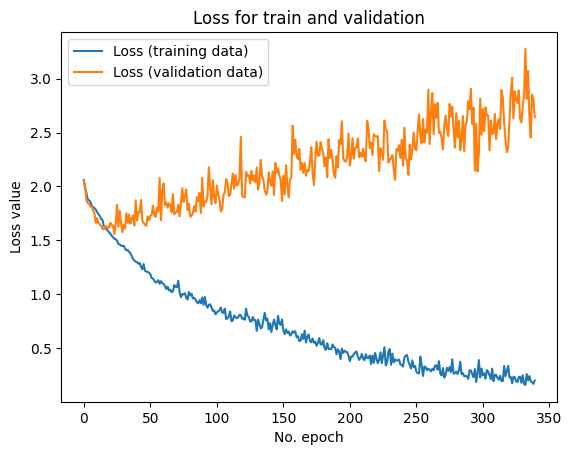

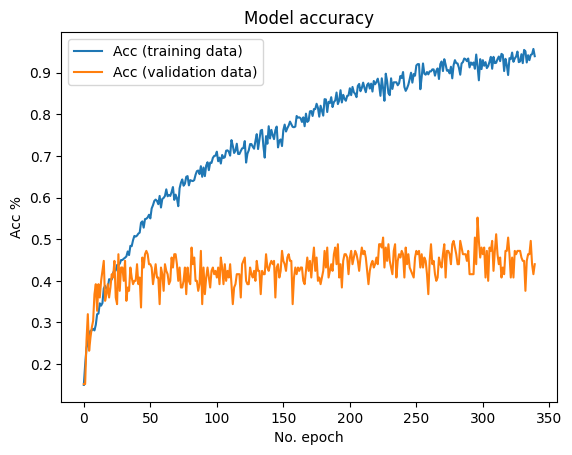

In [118]:
# Loss, Accuracy presentation

# Plot history: Loss
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for train and validation')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

#Plot history: Accuracy
plt.plot(history.history['categorical_accuracy'], label='Acc (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='Acc (validation data)')
plt.title('Model accuracy')
plt.ylabel('Acc %')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [119]:
# Validation score
loss,acc = model.evaluate(X_val, y_val, verbose=2)

4/4 - 0s - loss: 2.6435 - categorical_accuracy: 0.4400 - 387ms/epoch - 97ms/step
